In [172]:
import os
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [173]:
os.chdir(Path.home() / 'code/python/islp')

In [174]:
df = pd.read_csv('data/Auto.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
388,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
389,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
390,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


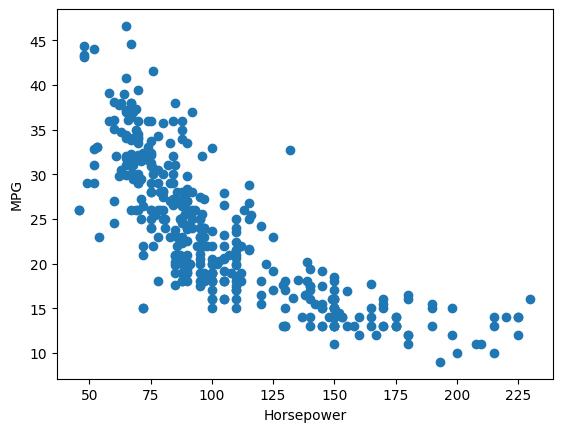

In [175]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.show()

In [176]:
model = smf.ols('mpg ~ horsepower', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        14:10:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
predictions = model.get_prediction(pd.DataFrame({'horsepower': [98]}))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


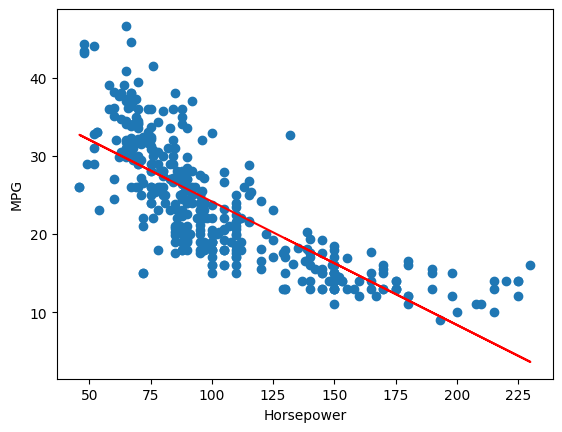

In [178]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(df['horsepower'].astype('float'), model.fittedvalues, color='red')
plt.show()

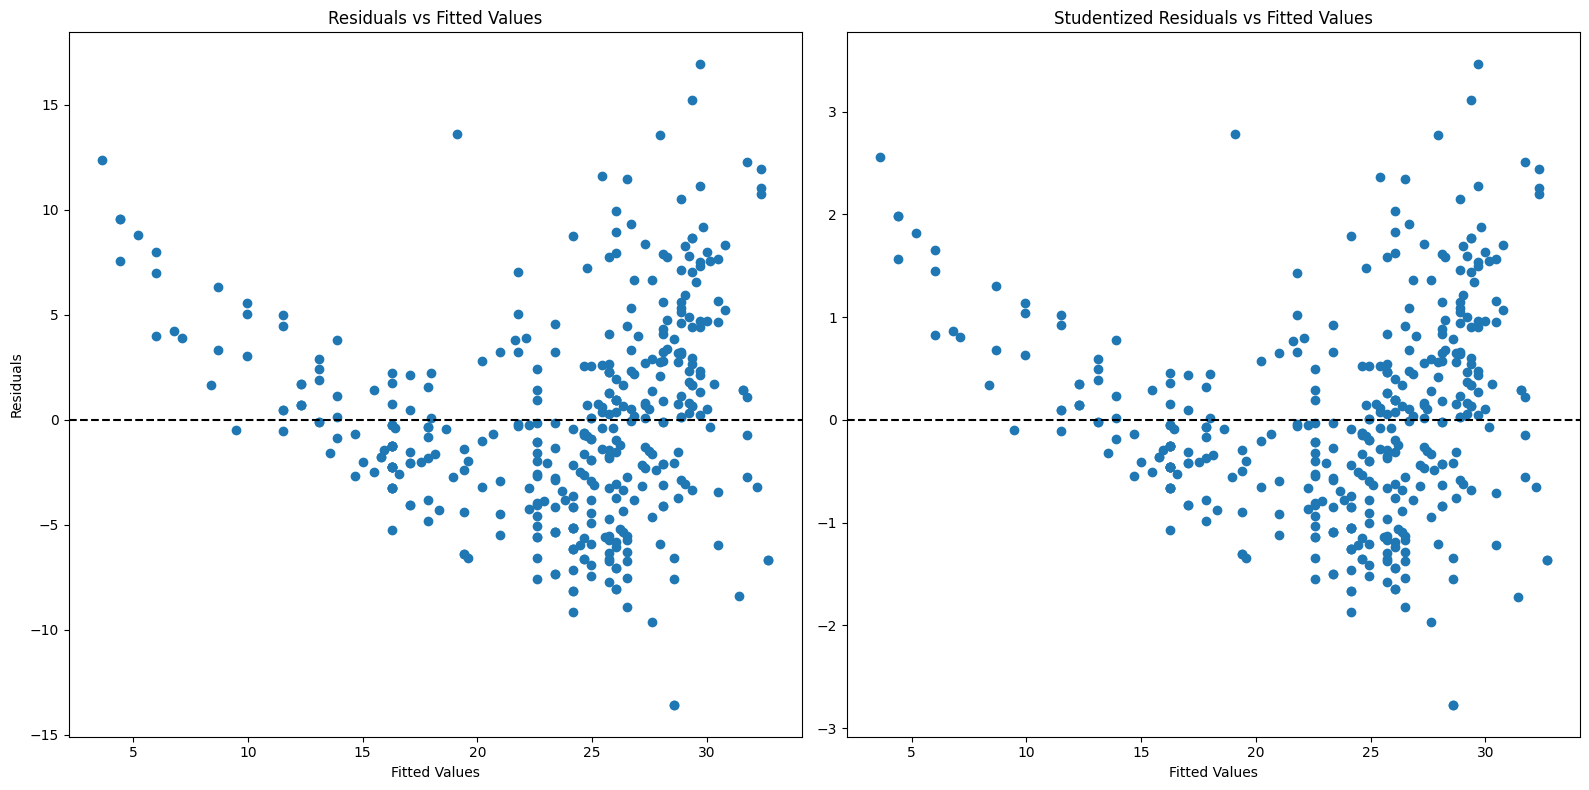

In [179]:
infl = model.get_influence()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].scatter(model.fittedvalues, model.resid)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values')

axes[1].scatter(model.fittedvalues, infl.resid_studentized)
axes[1].axhline(0, color='k', linestyle='--')
axes[1].set_xlabel('Fitted Values')
axes[1].set_title('Studentized Residuals vs Fitted Values')

plt.tight_layout()
plt.show()

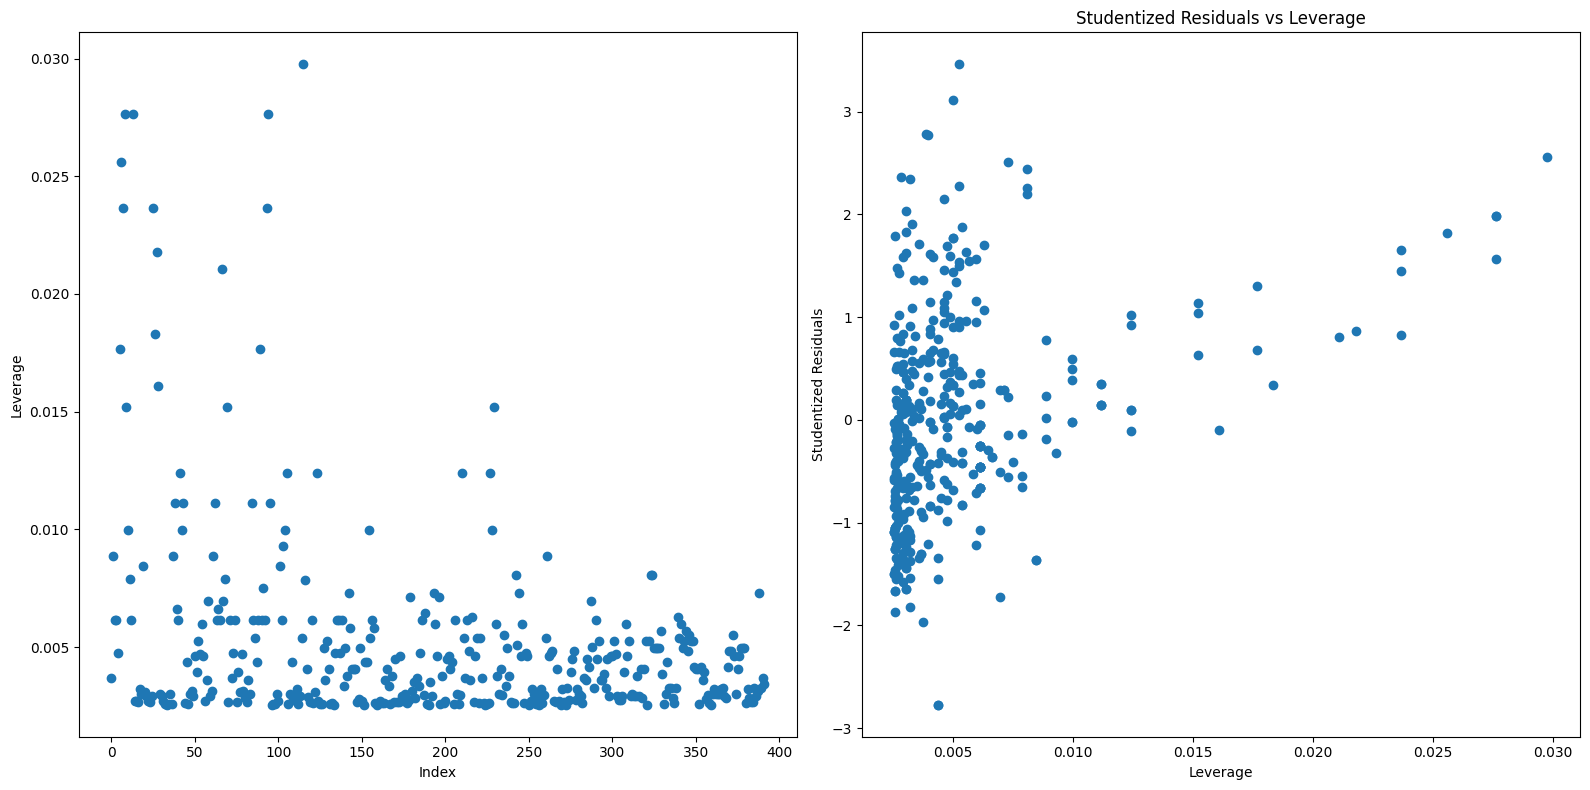

In [180]:
infl = model.get_influence()

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(np.arange(df.shape[0]), infl.hat_matrix_diag)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

axes[1].scatter(infl.hat_matrix_diag, infl.resid_studentized)
axes[1].set_xlabel('Leverage')
axes[1].set_ylabel('Studentized Residuals')
axes[1].set_title('Studentized Residuals vs Leverage')

plt.tight_layout()
plt.show()

In [181]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


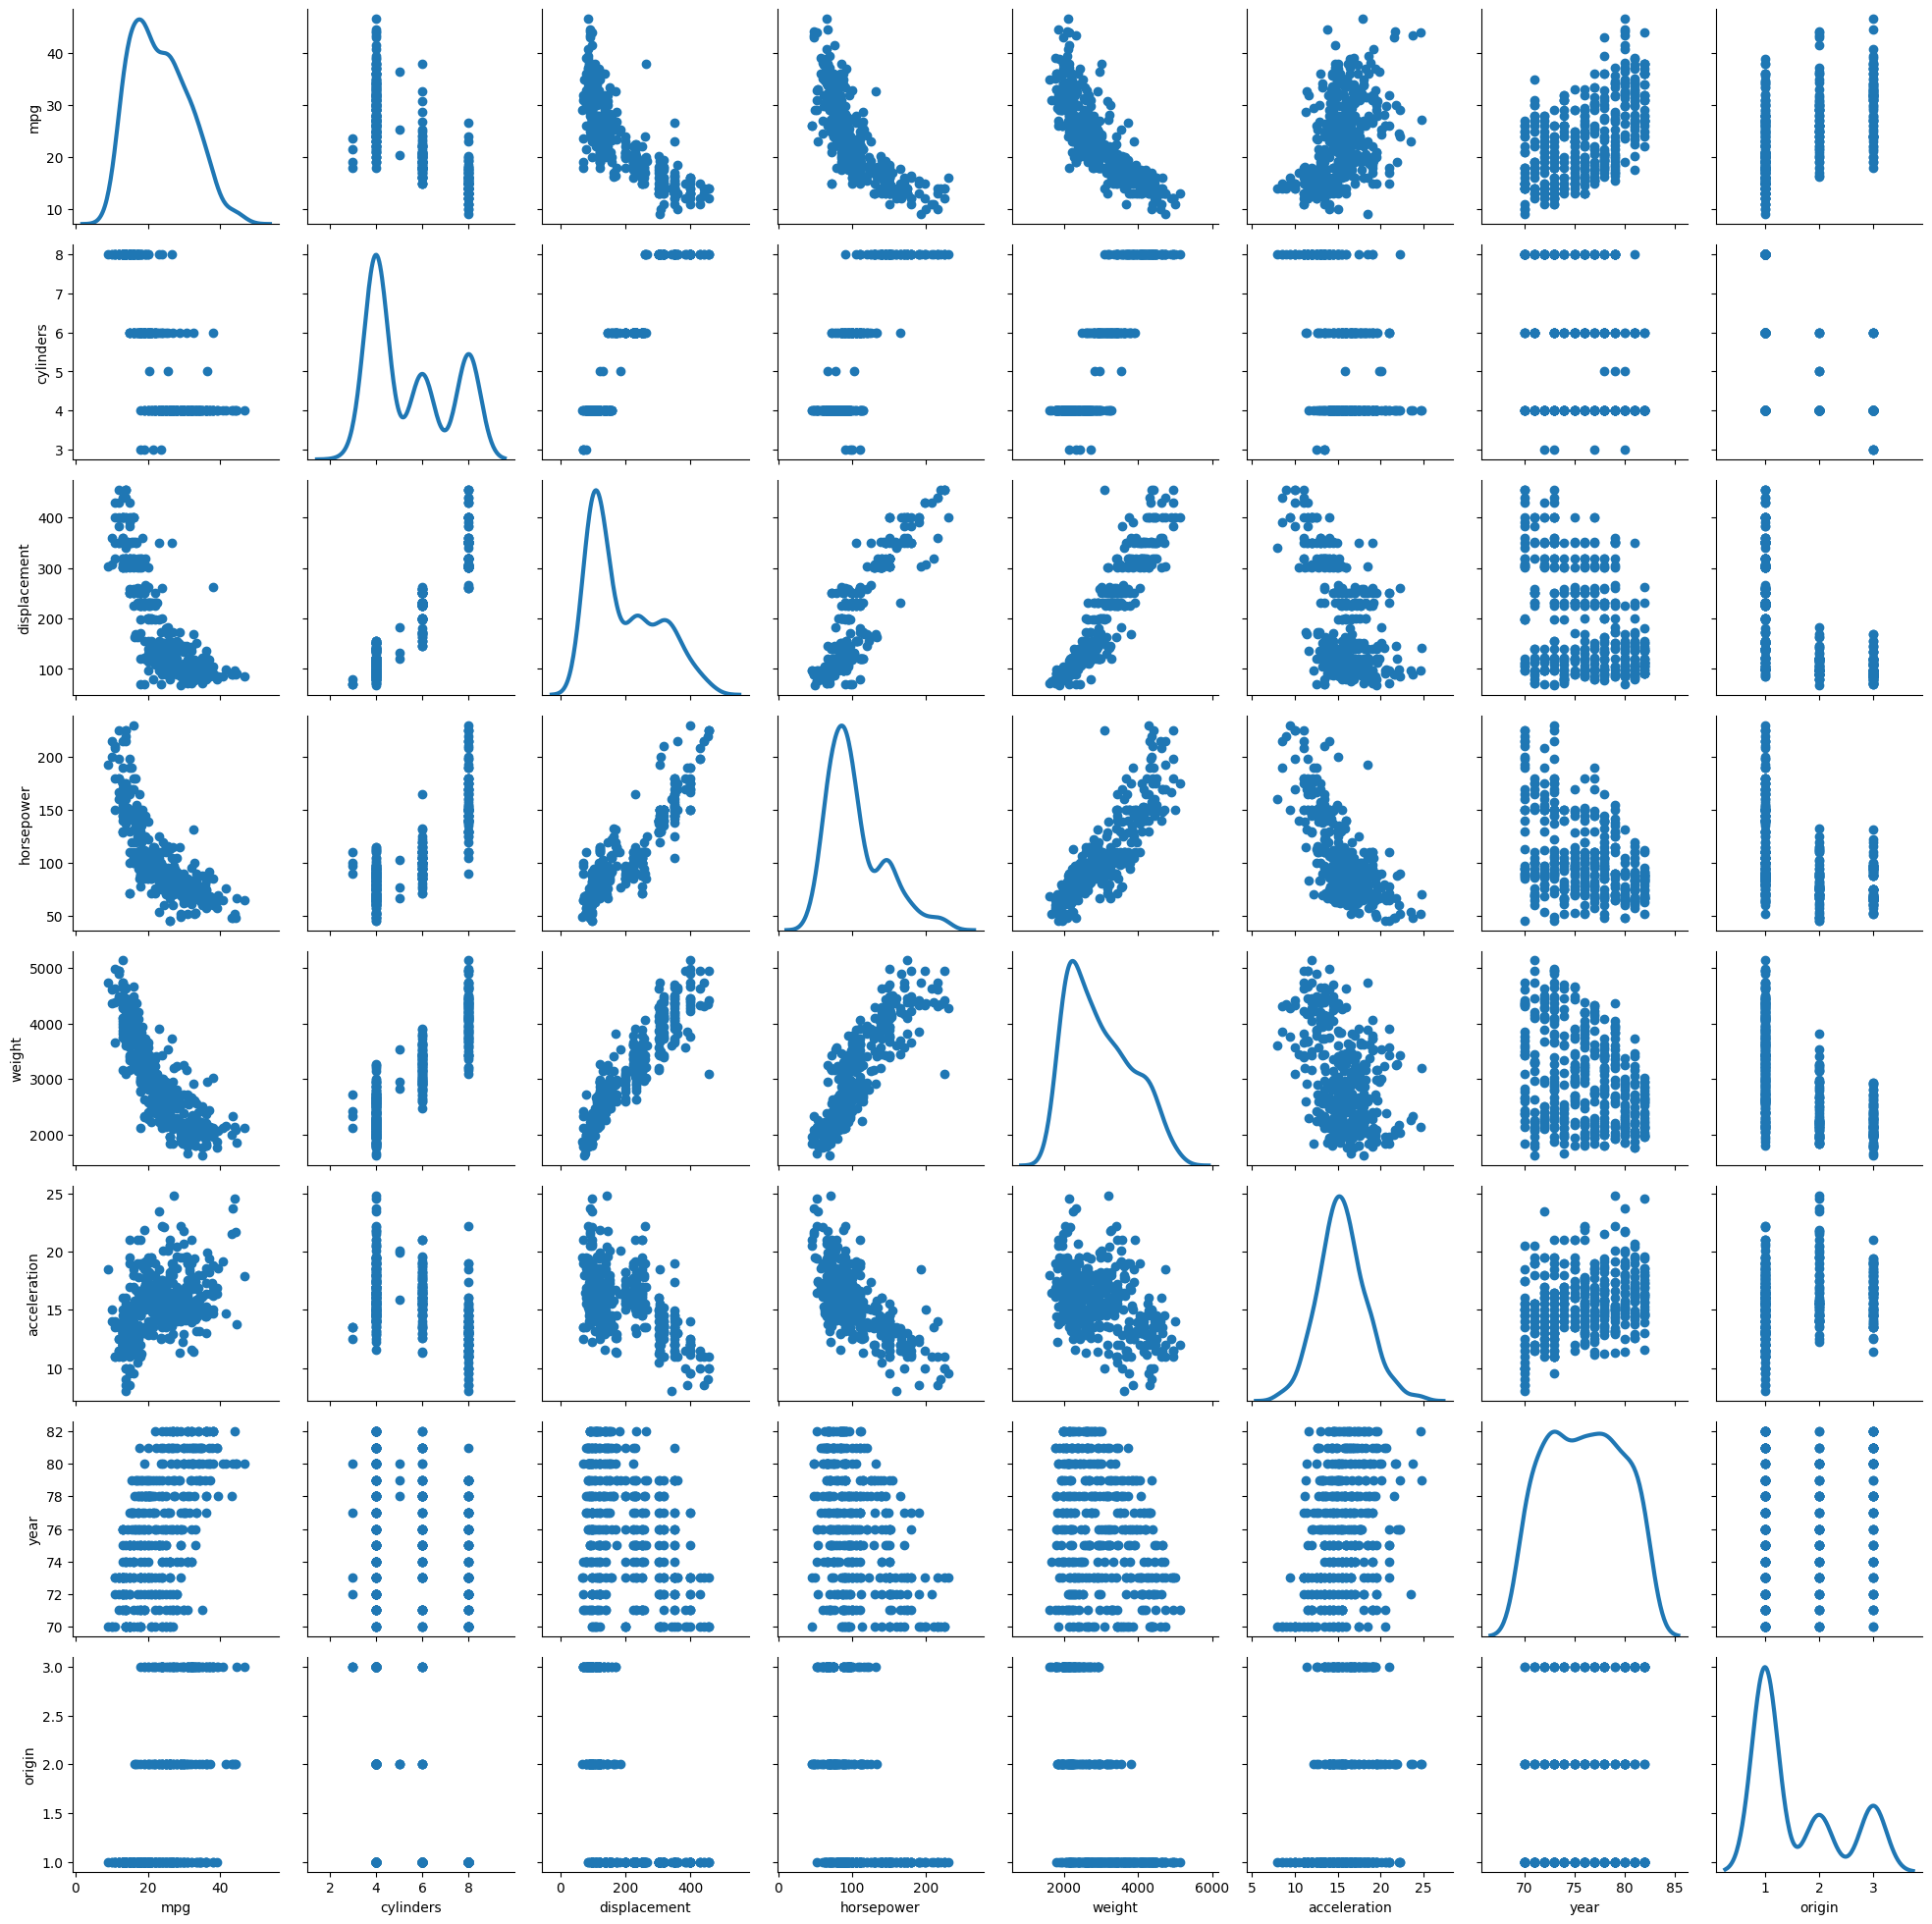

In [182]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_offdiag(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [183]:
df.set_index('name', drop=True, inplace=True)

In [184]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


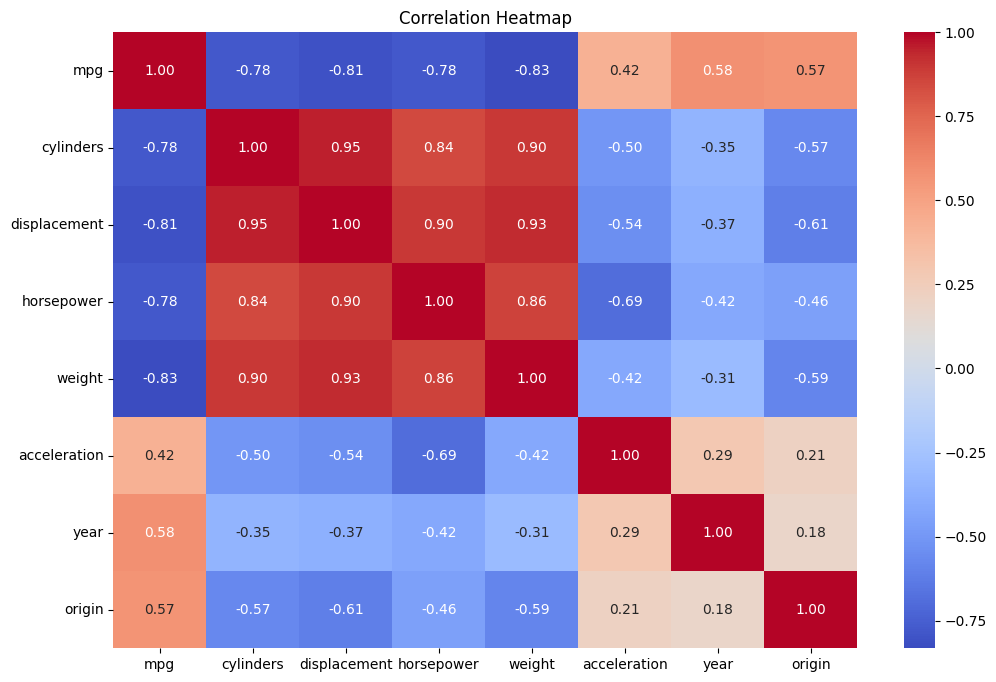

In [185]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [186]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          2.04e-139
Time:                        14:11:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


In [188]:
df = pd.read_csv('data/Carseats.csv')
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [189]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [190]:
model = smf.ols('Sales ~ Price + Urban + US', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        14:11:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
model = smf.ols(formula='Sales ~ Price + US',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.66e-24
Time:                        14:11:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
model.conf_int(alpha=.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


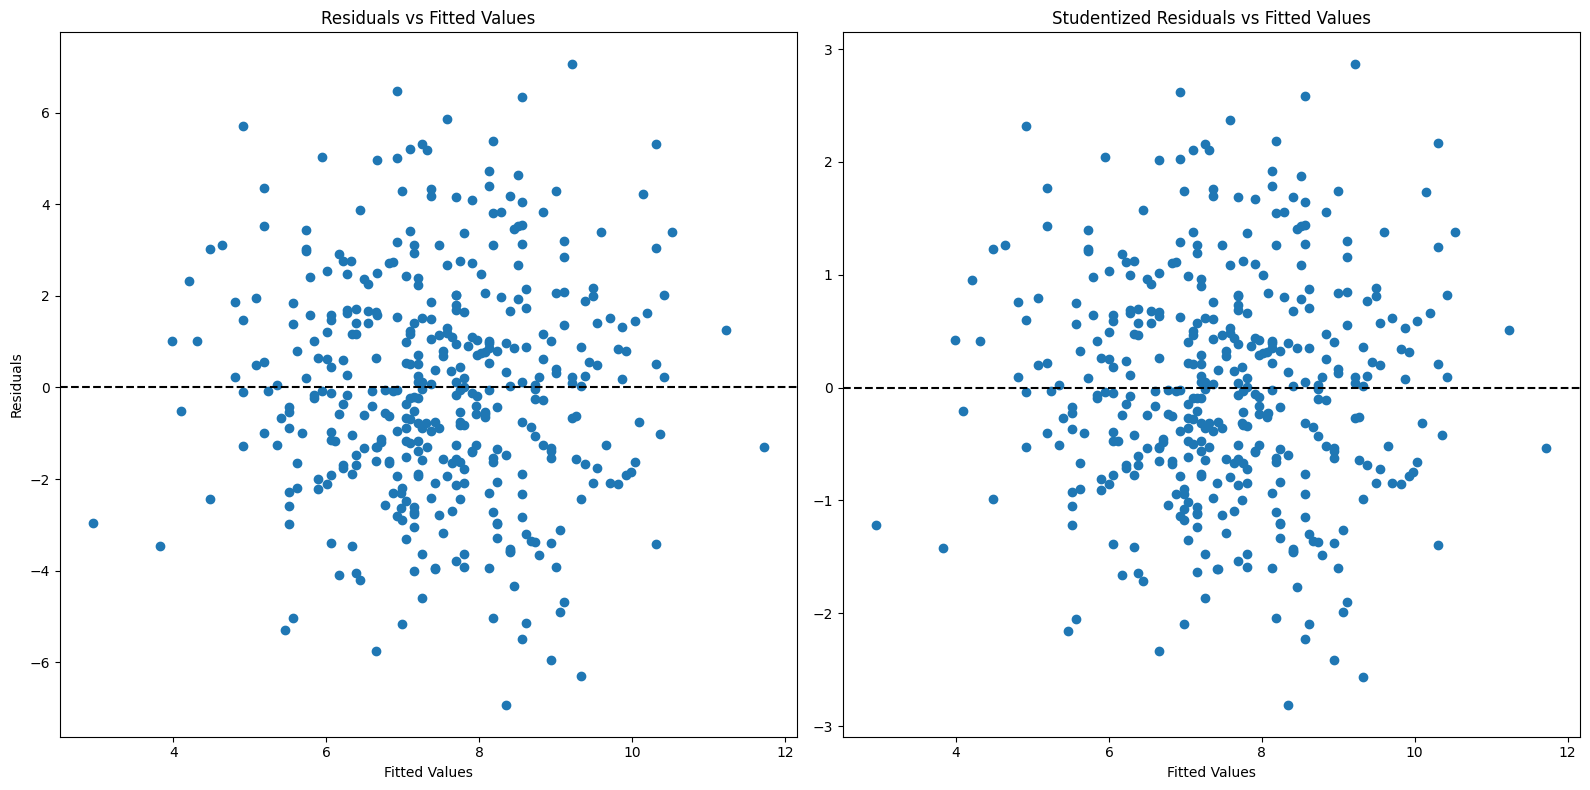

In [193]:
infl = model.get_influence()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].scatter(model.fittedvalues, model.resid)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values')

axes[1].scatter(model.fittedvalues, infl.resid_studentized)
axes[1].axhline(0, color='k', linestyle='--')
axes[1].set_xlabel('Fitted Values')
axes[1].set_title('Studentized Residuals vs Fitted Values')

plt.tight_layout()
plt.show()

In [194]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [195]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        14:11:01   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
rng = np.random.default_rng(5)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

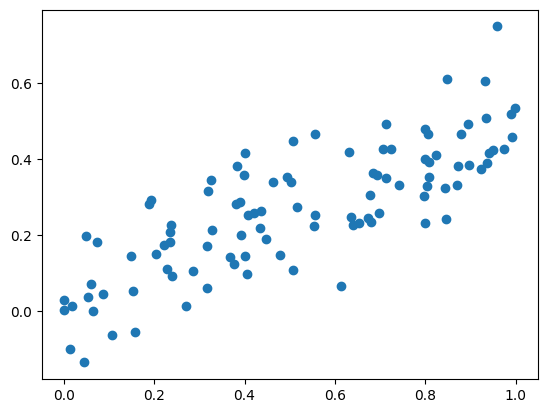

In [197]:
plt.scatter(x1, x2)
plt.show()

In [198]:
np.corrcoef(x1, x2)

array([[1.        , 0.79861815],
       [0.79861815, 1.        ]])

In [199]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
model = smf.ols('y ~ x1 + x2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     23.89
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           3.68e-09
Time:                        14:11:01   Log-Likelihood:                -136.91
No. Observations:                 100   AIC:                             279.8
Df Residuals:                      97   BIC:                             287.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9414      0.199      9.768      0.000       1.547       2.336
x1             2.0959      0.544      3.850      0.000       1.015       3.176
x2             0.3673      0.967      0.380      0.705      -1.552       2.286
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.573
Skew:                          -0.153   Prob(JB):                        0.751
Kurtosis:                       3.209   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
model = smf.ols('y ~ x1', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     48.05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           4.45e-10
Time:                        14:11:01   Log-Likelihood:                -136.98
No. Observations:                 100   AIC:                             278.0
Df Residuals:                      98   BIC:                             283.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9544      0.195     10.028      0.000       1.568       2.341
x1             2.2611      0.326      6.932      0.000       1.614       2.908
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.512
Skew:                          -0.122   Prob(JB):                        0.774
Kurtosis:                       3.252   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
model = smf.ols('y ~ x2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.88
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           5.22e-07
Time:                        14:11:01   Log-Likelihood:                -144.02
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2301      0.197     11.343      0.000       1.840       2.620
x2             3.3400      0.622      5.374      0.000       2.107       4.573
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.713
Skew:                          -0.320   Prob(JB):                        0.425
Kurtosis:                       2.972   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [203]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
model = smf.ols('y ~ x1 + x2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.13
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.17e-08
Time:                        14:11:01   Log-Likelihood:                -142.13
No. Observations:                 101   AIC:                             290.3
Df Residuals:                      98   BIC:                             298.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9631      0.206      9.515      0.000       1.554       2.372
x1             1.2411      0.479      2.590      0.011       0.290       2.192
x2             2.0217      0.819      2.468      0.015       0.396       3.647
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.795
Skew:                          -0.207   Prob(JB):                        0.672
Kurtosis:                       3.129   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
model = smf.ols('y ~ x1', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     36.31
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.89e-08
Time:                        14:11:01   Log-Likelihood:                -145.18
No. Observations:                 101   AIC:                             294.4
Df Residuals:                      99   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0845      0.205     10.146      0.000       1.677       2.492
x1             2.0821      0.346      6.026      0.000       1.396       2.768
==============================================================================
Omnibus:                        6.215   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.791
Skew:                           0.284   Prob(JB):                       0.0203
Kurtosis:                       4.236   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
model = smf.ols('y ~ x2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.51
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           3.90e-08
Time:                        14:11:01   Log-Likelihood:                -145.48
No. Observations:                 101   AIC:                             295.0
Df Residuals:                      99   BIC:                             300.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1888      0.192     11.382      0.000       1.807       2.570
x2             3.5301      0.592      5.959      0.000       2.355       4.705
==============================================================================
Omnibus:                        2.401   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.136
Skew:                          -0.356   Prob(JB):                        0.344
Kurtosis:                       2.998   Cond. No.                         6.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

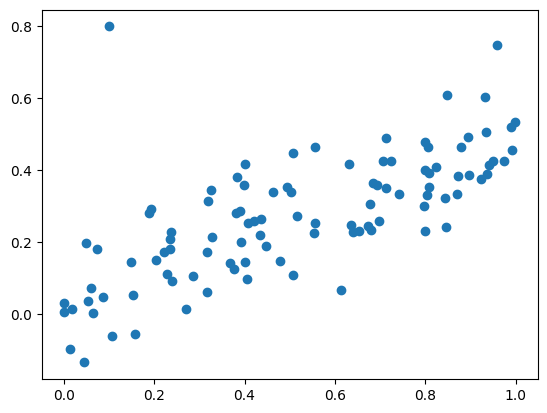

In [206]:
plt.scatter(x1, x2)
plt.show()

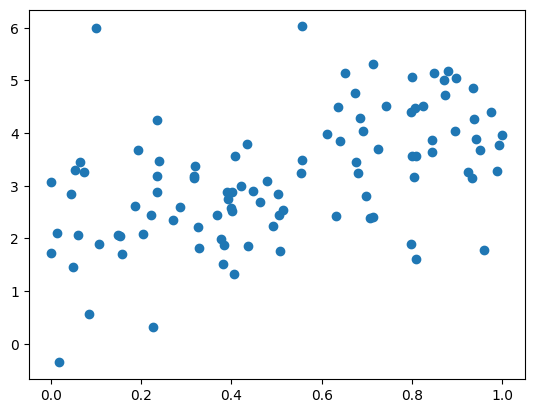

In [207]:
plt.scatter(x1, y)
plt.show()

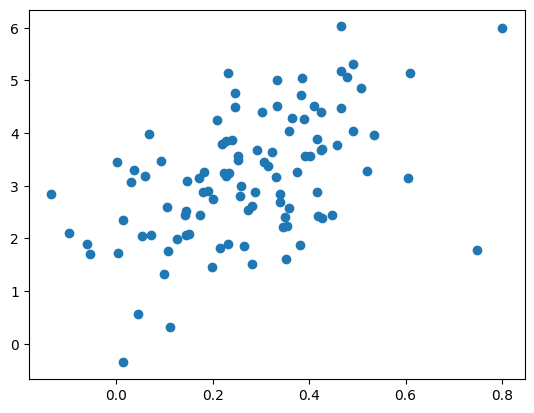

In [208]:
plt.scatter(x2, y)
plt.show()

In [209]:
df = pd.read_csv('data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [210]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [211]:
response = 'crim'

for predictor in df.columns:
    if predictor != response:
        formula = f'{response} ~ {predictor}'
        model = smf.ols(formula, data=df).fit()
        print(f'Predictor: {predictor}')
        print(pd.DataFrame({
                "coef": model.params,
                "std err": model.bse,
                "t": model.tvalues,
                "P>|t|": model.pvalues,
                "0.025": model.conf_int()[0],
                "0.975": model.conf_int()[1]
                }))

Predictor: zn
               coef   std err          t         P>|t|     0.025     0.975
Intercept  4.453694  0.417218  10.674746  4.037668e-24  3.633993  5.273394
zn        -0.073935  0.016095  -4.593776  5.506472e-06 -0.105556 -0.042314
Predictor: indus
               coef   std err         t         P>|t|     0.025     0.975
Intercept -2.063743  0.667228 -3.093008  2.091266e-03 -3.374634 -0.752851
indus      0.509776  0.051024  9.990848  1.450349e-21  0.409530  0.610023
Predictor: chas
               coef   std err         t         P>|t|     0.025     0.975
Intercept  3.744447  0.396111  9.453021  1.239505e-19  2.966214  4.522679
chas      -1.892777  1.506115 -1.256727  2.094345e-01 -4.851815  1.066261
Predictor: nox
                coef   std err          t         P>|t|      0.025      0.975
Intercept -13.719882  1.699479  -8.072992  5.076814e-15 -17.058819 -10.380946
nox        31.248531  2.999190  10.418989  3.751739e-23  25.356076  37.140987
Predictor: rm
                coef 

In [219]:
model = smf.ols('crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat + medv', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.03e-56
Time:                        14:12:54   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""